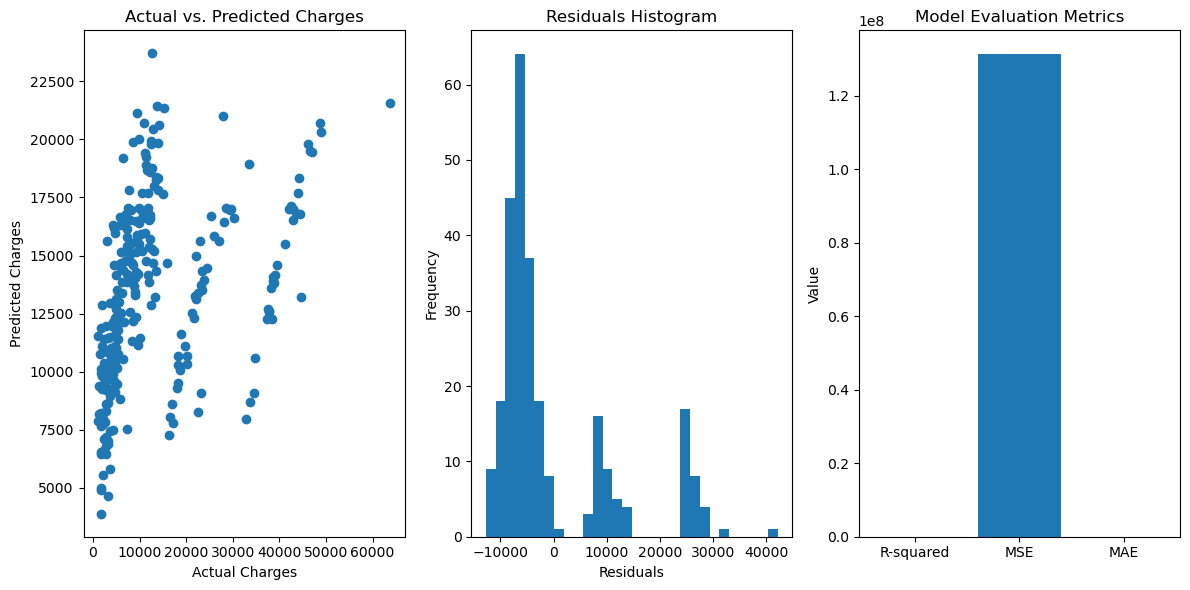

R-squared: 0.15489592484270753
MSE: 131201335.64669806
MAE: 9181.311632897381


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Membaca data dari CSV
data = pd.read_csv('./data/insurance.csv')  # Pastikan Anda sudah memiliki file data.csv

# 1. Identifikasi variabel-variabel
# Variabel bebas (fitur)
X = data[['age', 'bmi', 'children']]
# Variabel target (biaya medis personal)
y = data['charges']

# 2. Bagi dataset menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling tidak diperlukan dalam regresi linear multipel, karena koefisien akan disesuaikan.

# 4. Buat model multiple linear regression menggunakan Scikit-Learn
model = LinearRegression()

# 5. Latih model pada data latih
model.fit(X_train, y_train)

# 6. Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# 6. Evaluasi model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Tampilkan hasil evaluasi menggunakan pyplot
plt.figure(figsize=(12, 6))

# Scatter plot data uji vs. prediksi
plt.subplot(131)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")

# Histogram residu (error)
plt.subplot(132)
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")

# Metrik evaluasi
plt.subplot(133)
metrics = [r_squared, mse, mae]
labels = ['R-squared', 'MSE', 'MAE']
plt.bar(labels, metrics)
plt.ylabel("Value")
plt.title("Model Evaluation Metrics")

plt.tight_layout()
plt.show()

# Tampilkan hasil evaluasi numerik
print("R-squared:", r_squared)
print("MSE:", mse)
print("MAE:", mae)
